In [1]:
from kerykeion import AstrologicalSubject
from datetime import timedelta, date, datetime
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('OFFICIAL_DF_HOUSE.csv')

In [3]:
df.head()

,Month,Day,Year,Hour,Minute,Time,Sun House,Moon House,Mercury House,Venus House,Mars House,Jupiter House,Saturn House,Uranus House,Neptune House
0,12,24,1889,3,38,218,2,3,2,2,12,3,10,12,7
1,12,24,1889,20,48,1248,5,6,6,5,3,6,1,3,10
2,12,24,1889,15,28,928,8,9,8,7,6,8,4,6,1
3,12,24,1889,5,24,324,1,2,2,1,11,2,9,11,6
4,12,24,1889,10,24,624,11,12,11,10,8,11,7,8,3


In [12]:
df=df[['Month', 'Day', 'Year','Hour','Minute','Time','Sun House','Mercury House','Venus House','Moon House','Mars House','Jupiter House','Saturn House', 'Uranus House', 'Neptune House']]

In [13]:
def prob_matrix(p1,p2):
    mutual_info=np.zeros((12,12))
    for i in range (1,13):
        for j in range (1,13):
            adjusted_df=df[(df[p1]==i) & (df[p2]==j)]
            mutual_info[i-1,j-1]=adjusted_df.shape[0]
    prob=mutual_info/np.sum(mutual_info)
    return prob

In [14]:
planets=['Sun House','Mercury House','Venus House','Moon House','Mars House','Jupiter House','Saturn House', 'Uranus House', 'Neptune House']

In [15]:
def mutual_information(matrix):
    m_i = 0.0
    X = matrix.shape[0]
    Y = matrix.shape[1]
    
    for x in range(X):
        for y in range(Y):
            pxy = matrix[x,y]
            px = sum(matrix[x,:])
            py = sum(matrix[:,y])
            
            if (pxy!=0):
                m_i += pxy*np.log2(pxy/(px*py))
    return m_i

In [16]:
mutual_df=pd.DataFrame(columns=planets)

In [17]:
for p1 in planets:
    new_entry={}
    for p2 in planets:
        prob=prob_matrix(p1,p2)
        mutual_info=mutual_information(prob)
        #new_entry[p2]=mutual_info
        if (p1==p2):
            new_entry[p2]=0.0000
        else:
            new_entry[p2]=mutual_info
    new_entry['base']=p1
    mutual_df = pd.concat([mutual_df, pd.DataFrame([new_entry])], ignore_index=True)

In [18]:
mutual_df.index=mutual_df['base']
mutual_df = mutual_df.drop('base', axis=1)
mutual_df=mutual_df[['Sun House','Mercury House','Venus House','Moon House','Mars House','Jupiter House','Saturn House', 'Uranus House', 'Neptune House']]

In [19]:
mutual_df

,Sun House,Mercury House,Venus House,Moon House,Mars House,Jupiter House,Saturn House,Uranus House,Neptune House
base,,,,,,,,,
Sun House,0.000000,2.098659,1.419369,0.006275,0.151210,0.014652,0.005404,0.006643,0.004157
Mercury House,2.098659,0.000000,1.225536,0.005918,0.138618,0.021601,0.014323,0.008330,0.012775
Venus House,1.419369,1.225536,0.000000,0.006232,0.110777,0.018262,0.021460,0.011708,0.016423
Moon House,0.006275,0.005918,0.006232,0.000000,0.005179,0.005858,0.005168,0.004207,0.004152
Mars House,0.151210,0.138618,0.110777,0.005179,0.000000,0.036093,0.033348,0.016632,0.028938
Jupiter House,0.014652,0.021601,0.018262,0.005858,0.036093,0.000000,0.279611,0.157274,0.106766
Saturn House,0.005404,0.014323,0.021460,0.005168,0.033348,0.279611,0.000000,0.132584,0.105927
Uranus House,0.006643,0.008330,0.011708,0.004207,0.016632,0.157274,0.132584,0.000000,0.187175
Neptune House,0.004157,0.012775,0.016423,0.004152,0.028938,0.106766,0.105927,0.187175,0.000000


<AxesSubplot:ylabel='base'>

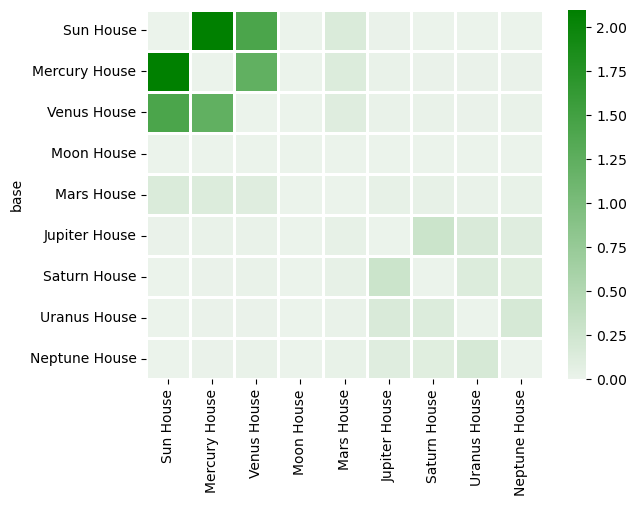

In [11]:
green_cmap = sns.light_palette("green", as_cmap=True)
sns.heatmap(mutual_df, cmap=green_cmap,linewidths=1)